# Klasifikasi Citra
## Nama : Rifqi Alfinnur Charisma
## NIM : 19104031

In [2]:
# import library yang dibutuhkan
import pandas as pd
from sklearn import svm
from sklearn.model_selection import GridSearchCV
import os
import matplotlib.pyplot as plt
from skimage.transform import resize
from skimage.io import imread
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
import pickle

In [3]:
categories = ['Besar', 'Kecil']

flat_data_arr=[]
target_arr=[]
datadir='E:\Ripki Alfinnur\Belajar_Ai\Klasifikasi Tanaman\Dataset1'

for i in categories:
  print(f'loading... category : {i}')
  path=os.path.join(datadir,i)
  for img in os.listdir(path):
    img_array=imread(os.path.join(path,img))
    img_resized=resize(img_array,(150,150,3))
    flat_data_arr.append(img_resized.flatten())
    target_arr.append(categories.index(i))
  print(f'loaded category:{i} selesai')

flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data)
df['Target']=target
df

loading... category : Besar
loaded category:Besar selesai
loading... category : Kecil
loaded category:Kecil selesai


,0,1,2,3,4,5,6,7,8,9,...,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
0,0.866667,0.882353,0.898039,0.866667,0.878431,0.898039,0.866667,0.882353,0.898039,0.870588,...,0.890196,0.925490,0.964706,0.890196,0.925490,0.964706,0.890196,0.925490,0.964706,0
1,0.741176,0.674510,0.615686,0.741176,0.674510,0.611765,0.752941,0.686275,0.619608,0.756863,...,0.898039,0.949020,0.992157,0.901961,0.949020,0.992157,0.901961,0.949020,0.992157,0
2,0.658824,0.627451,0.619608,0.654902,0.631373,0.623529,0.654902,0.627451,0.623529,0.654902,...,0.796078,0.807843,0.823529,0.800000,0.807843,0.827451,0.800000,0.807843,0.823529,0
3,0.901961,0.917647,0.937255,0.901961,0.921569,0.941176,0.901961,0.921569,0.941176,0.905882,...,0.972549,0.992157,0.992157,0.972549,0.992157,0.992157,0.972549,0.992157,0.992157,0
4,0.905882,0.929412,0.952941,0.909804,0.933333,0.956863,0.909804,0.933333,0.956863,0.909804,...,0.972549,0.992157,0.992157,0.972549,0.992157,0.992157,0.972549,0.992157,0.992157,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.713725,0.678431,0.721569,0.713725,0.678431,0.721569,0.713725,0.678431,0.721569,0.713725,...,0.776471,0.784314,0.874510,0.776471,0.784314,0.874510,0.776471,0.788235,0.878431,1
196,0.694118,0.662745,0.709804,0.690196,0.662745,0.705882,0.689210,0.662745,0.704863,0.690196,...,0.811765,0.811765,0.890196,0.811765,0.811707,0.890196,0.811765,0.807843,0.890196,1
197,0.701961,0.666667,0.709804,0.698039,0.666667,0.705882,0.698039,0.666667,0.709804,0.698039,...,0.828437,0.823529,0.905882,0.827451,0.823529,0.905882,0.827451,0.819608,0.901961,1
198,0.701961,0.666667,0.709804,0.701961,0.666667,0.705882,0.701961,0.666667,0.705882,0.700989,...,0.776471,0.792157,0.894118,0.776471,0.792157,0.890196,0.780392,0.792157,0.890196,1


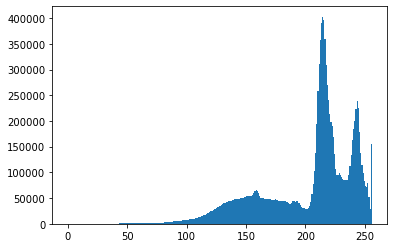

In [4]:
# Histogram
import cv2
import numpy as np
#from matplotlib import pyplot as plt

img = cv2.imread('Dataset1/Besar/M1.jpg',0)
plt.hist(img.ravel(),256,[0,256]);
plt.show()

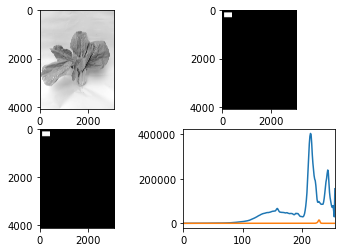

In [5]:
# Histogram dengan lokasi citra tertentu

# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[100:300, 100:400] = 255
masked_img = cv2.bitwise_and(img,img,mask = mask)
 
# Calculate histogram with mask and without mask
# Check third argument for mask
hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])
 
plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])
 
plt.show()

In [6]:
# membagi dataset menjadi data train dan data validasi
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,
                                               random_state=77,stratify=y)
print('Proses memisahkan data selesai')

Proses memisahkan data selesai


In [6]:
# proses cross validasi untuk mencari parameter terbaik
param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],
            'kernel':['rbf','poly']}
            
svc=svm.SVC(probability=True)
print("Proses pelatihan model...")
model=GridSearchCV(svc,param_grid)
model.fit(x_train,y_train)
print('Selesai...')
model.best_params_

Proses pelatihan model...
Selesai...


{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}

In [7]:
model = svm.SVC(C=10, gamma=0.0001, kernel='rbf',
             probability = True)
model.fit(x_train,y_train)
print('Selesai...')

Selesai...


In [8]:
# hasil prediksi data validasi
y_pred = model.predict(x_test)
print(f'Prediksi label : {y_pred}')
print(f'Ground Truth   : {np.array(y_test)}')
print(f'Akurasi model  : {accuracy_score(y_pred,y_test)*100}%')

Prediksi label : [1 1 1 0 1 1 0 0 1 1 0 1 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1
 0 1 0]
Ground Truth   : [1 1 1 0 1 1 0 0 1 1 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1
 0 1 0]
Akurasi model  : 97.5%


In [9]:
# menyimpan model yang telah dilatih
pickle.dump(model,open('img_model.p','wb'))
print(f'Model telah disimpan.')

Model telah disimpan.


## Load The Model

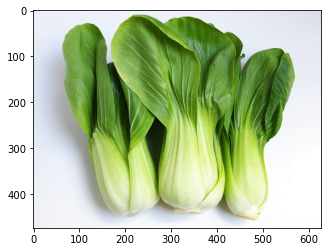

Besar = 99.0124142676016%
Kecil = 0.9875857323984099%
Gambar tesebut merupakan : Besar


In [10]:
# menggunakan model untuk memprediksi label data lain
import pickle
import matplotlib.pyplot as plt
from skimage.transform import resize
from skimage.io import imread

categories = ['Besar', 'Kecil']

model = pickle.load(open('img_model.p','rb'))
img=imread('pakcoy.jpg')
plt.imshow(img)
plt.show()

img_resize=resize(img,(150,150,3))
l=[img_resize.flatten()]
probability=model.predict_proba(l)

for ind,val in enumerate(categories):
  print(f'{val} = {probability[0][ind]*100}%')

print("Gambar tesebut merupakan : "+ categories[model.predict(l)[0]])

## Mencoba Visualisasi

          0         1         2         3         4         5         6  \
0  0.996078  0.996078  0.996078  0.996078  0.996078  0.996078  0.996078   
1  0.717647  0.717647  0.717647  0.721569  0.721569  0.721569  0.723582   
2  0.184641  0.170915  0.162092  0.263725  0.237255  0.174510  0.286275   
3  0.760784  0.690196  0.611765  0.752941  0.686275  0.607843  0.756863   
4  0.260850  0.264771  0.276536  0.279477  0.271239  0.275556  0.114641   

          7         8         9  ...     67491     67492     67493     67494  \
0  0.996078  0.996078  0.996078  ...  0.996078  0.996078  0.996078  0.996078   
1  0.723582  0.723582  0.725490  ...  0.338209  0.320562  0.308797  0.337255   
2  0.243137  0.173203  0.286275  ...  0.592157  0.596078  0.603922  0.601961   
3  0.690196  0.611765  0.749020  ...  0.427451  0.462745  0.450980  0.427451   
4  0.102876  0.099374  0.062745  ...  0.537255  0.511438  0.505882  0.552941   

      67495     67496     67497     67498     67499  Target  
0  0.9

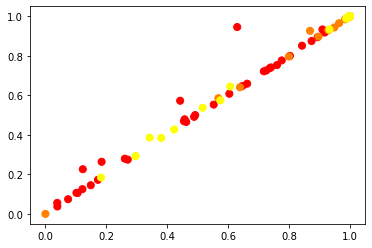

In [26]:
import seaborn as sns
print(df.head())
y = df['Target']
X = df.iloc[:, :-1]

plt.scatter(X.iloc[:, 0], X.iloc[:, 3], c=y, s=50, cmap='autumn')

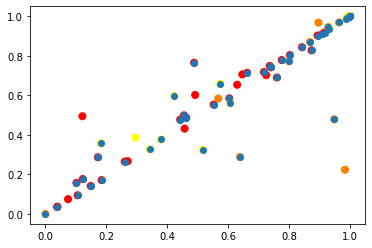

In [32]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=50, cmap='autumn')
plt.scatter(model.support_vectors_[:,0],model.support_vectors_[:,1])

ValueError: X.shape[1] = 2 should be equal to 67500, the number of features at training time

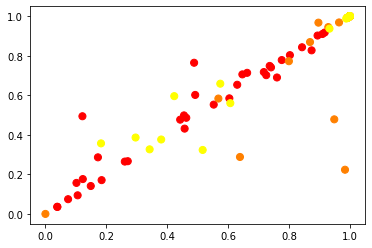

In [33]:
import numpy as np

ax = plt.gca()
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=50, cmap='autumn')
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()